In [157]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import dash
import datetime as dt
from matplotlib.colors import ListedColormap
%matplotlib inline
from dash import dcc
from dash import html
from itertools import chain
from collections import Counter
from dash.dependencies import Input, Output

In [158]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [159]:
# df = pd.read_csv('D:\Project\df.csv')
# dfd = pd.read_csv('D:\Project\dfd.csv')
# dfc = pd.read_csv('D:\Project\dfc.csv')
# ndfc = pd.read_csv('D:\Project\dfcc.csv')
# ndfd = pd.read_csv('D:\Project\dfdd.csv')
# del dfd['Unnamed: 0']
# del dfc['Unnamed: 0']
# del ndfc['Unnamed: 0']
# del ndfd['Unnamed: 0']
# dfc.drop(dfc.head(80).index,inplace=True)
# dfd.drop(dfd.head(80).index,inplace=True)
# ndfc.drop(ndfc.head(80).index,inplace=True)
# ndfd.drop(ndfd.head(80).index,inplace=True)
# dfc.drop(dfc.tail(20).index,inplace=True)
# dfd.drop(dfd.tail(20).index,inplace=True)
# ndfc.drop(ndfc.tail(20).index,inplace=True)
# ndfd.drop(ndfd.tail(20).index,inplace=True)
#dfcsr = pd.read_csv('D:\dfcsr.csv')
#dfdsr = pd.read_csv('D:\dfdsr.csv')
#del dfcsr['Unnamed: 0']
#del dfdsr['Unnamed: 0']
#del dfdsr['nu']
#del dfcsr['nu']
# del dfc['Cases_on_an_international_conveyance_Japan']
# del dfd['Cases_on_an_international_conveyance_Japan']

In [160]:
# dfd = pd.read_csv('D:\Cs repozitorie\Project\CSVs\dfdd.csv')
# dfd.index = dfd['Unnamed: 0'].values
# del dfd['Unnamed: 0']
# dfd['nu'] = 0
# dfd['nu'] = dfd.index

# dfc = pd.read_csv('D:\Cs repozitorie\Project\CSVs\dfcc.csv')
# dfc.index = dfc['Unnamed: 0'].values
# del dfc['Unnamed: 0']
# dfc['nu'] = 0
# dfc['nu'] = dfc.index

# df = pd.read_csv('D:\Cs repozitorie\Project\CSVs\owid-covid-data.csv')

In [161]:
allcountli = list(dfc.columns)
allcountli.pop(0)
allcount = allcountli
for i in range(len(allcount)):
    allcount[i] = html.Option(value=allcount[i])

In [162]:
the_number_of_cases = dcc.RangeSlider(
    id='value-cases',
    min=150,
    max=557,
    value=[150, 557]
)


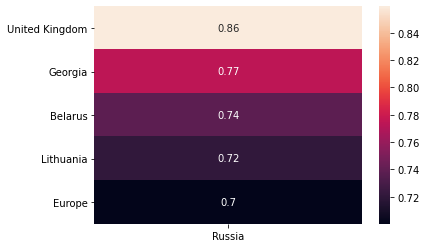

In [163]:
lisc = list(dfc.columns)
inp='Russia' #Afghanistan
inpcol=lisc.index(inp)
c = dfc.corr()
cd=c.iloc[:,[inpcol]]
cd=cd.sort_values(by=inp,ascending=False)
cd=cd[1:6]
sns.heatmap(cd,annot=True) # vmin=0,vmax=1
plt.show()

In [164]:
# corlist = dfc.columns
# dfcsr = dfc.copy(deep=True)
# dfdsr = dfd.copy(deep=True)
# for i in corlist:
#     for j in range(554):
#         dfcsr[i].iloc[j] = (dfcsr[i].iloc[j]-min(dfcsr[i]))/(max(dfcsr[i])-min(dfcsr[i]))
# for i in corlist:
#     for j in range(554):
#         dfdsr[i].iloc[j] = (dfdsr[i].iloc[j]-min(dfdsr[i]))/(max(dfdsr[i])-min(dfdsr[i]))

In [165]:
trace1 = go.Scatter(
        x=dfc['nu'],
        y=dfcsr['Russia'],
        name='cases',
        yaxis='y2'
    )
trace2 = go.Scatter(
        x=dfd['nu'],
        y=dfdsr['Russia'],
        name='death',
        yaxis='y2'
    )
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2, secondary_y=True)
fig['layout'].update(height=600, width=800, xaxis=dict(
        tickangle=45
    ))
fig.update_yaxes(range=[0, 1])
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, gridcolor='LightPink')
fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='blue', size=12))
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, gridcolor='LightPink')
fig.show()

In [166]:

trace3 = go.Scatter(
        x=dfc['nu'],
        y=dfcsr['Russia'],
        name='Russia',
        yaxis='y2'
    )
trace4 = go.Scatter(
        x=dfc['nu'],
        y=dfcsr[cd.iloc[0].name],
        name=cd.iloc[0].name,
        yaxis='y2'
    )
trace5 = go.Scatter(
        x=dfc['nu'],
        y=dfcsr[cd.iloc[1].name],
        name=cd.iloc[1].name,
        yaxis='y2'
    )
trace6 = go.Scatter(
        x=dfc['nu'],
        y=dfcsr[cd.iloc[2].name],
        name=cd.iloc[2].name,
        yaxis='y2'
    )
trace7 = go.Scatter(
        x=dfc['nu'],
        y=dfcsr[cd.iloc[3].name],
        name=cd.iloc[3].name,
        yaxis='y2'
    )
trace8 = go.Scatter(
        x=dfc['nu'],
        y=dfcsr[cd.iloc[4].name],
        name=cd.iloc[4].name,
        yaxis='y2'
    )
fig3 = make_subplots(specs=[[{"secondary_y": True}]])
fig3.add_trace(trace3)
fig3.add_trace(trace4)
fig3.add_trace(trace5)
fig3.add_trace(trace6)
fig3.add_trace(trace7)
fig3.add_trace(trace8)
fig3['layout'].update(height=600, width=800, xaxis=dict(
        tickangle=45
    ))
fig3.update_yaxes(range=[0, 1])
fig3.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, gridcolor='LightPink')
fig3.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='blue', size=12))
fig3.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, gridcolor='LightPink')
fig3.show()

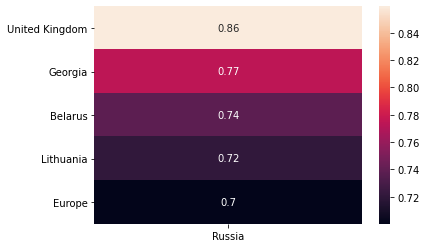

In [167]:
lisc = list(dfc.columns)
inp='Russia' #Afghanistan
inpcol=lisc.index(inp)
c = dfc.corr()
cd=c.iloc[:,[inpcol]]
cd=cd.sort_values(by=inp,ascending=False)
cd=cd[1:6]
sns.heatmap(cd,annot=True) # vmin=0,vmax=1
plt.show()

In [168]:
fig2 = px.imshow(cd)
fig2.update_layout(width=500, height=600, margin=dict(l=200, r=200, b=100, t=100))

In [169]:
# dfc = dfc.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x) #лагорифмирует все значения из датафреймов
# dfd = dfd.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x) #очень плохо реагирует на нули так как лагорифма его нет


In [170]:
# massiv = [0]*213
# for i in range(213):
#     massiv[i] = dfc.corr()['Afghanistan'].iloc[i]
# massivsor = sorted(massiv, reverse = True)[1:6]
# massivsor
# data = np.asarray(massivsor).reshape(5,1) 
# sns.heatmap(data, annot = True)
# plt.show() 

In [171]:
app = dash.Dash(__name__)

In [172]:
app.layout = html.Div([
    html.Div(children=[
        html.H1(children='График роста и спада заболеваемости',style={
            'textAlign': 'center',
        }),
        
        
        dcc.Graph(id='num-of-cas',
                  figure=fig),
        html.Div(children='Срок, за который вы хотите видеть рост/спад заболеваемости (в месяцах)',style={
            'textAlign': 'center'}),
        html.Div(the_number_of_cases,
                 style={'width': '400px',
                        'margine-bottom': '40px'}),
        html.Div('Какю страну вы хотите увидеть?'),
        dcc.Input(
            id='txtinput',
            type='text',
            pattern=r"^[A-Za-z].*",
            list='browser',
            autoFocus=True,
            value='Russia'
        ),
    ], style={'padding': 10, 'flex': 1, "top": "50%",
                        "left": "50%"}),
    
        html.Div(children=[
        html.H1(children='График стран с которыми наиболее коррелирует ',style={
            'textAlign': 'center',  
        }),
            
            
        dcc.Graph(id='figure3',
                  figure=fig3)
        
    ]),
    
    
        html.Div(children=[
        dcc.Graph(id='cor',
                  figure=fig2)
        
    ] ,style={'padding': 10, 'flex': 1, "top": "50%",
                        "left": "50%",
                 'justify-content': 'center',
  'align-items': 'left', 'margin': 'auto'
              }),
        
    
    html.Datalist(id='browser', children=allcount),
    #     html.Div([
    #         dcc.Graph(id='num-of-cas1', figure=fig) #возможно
    #     ]),
],style={'alignitems': 'center','display': 'flex', 'flex-direction': 'row'})

In [173]:
# @app.callback(
#     Output(component_id='num-of-cas', component_property='figure'),
#     Output(component_id='cor', component_property='figure'),
#     Input(component_id='value-cases', component_property='value'),
#     Input(component_id='txtinput', component_property='value'),
# )
# def update_num_of_cas(loh,con):
#     w=dfc[loh[0]:loh[1]]
#     ww=dfd[loh[0]:loh[1]]
    
#     w['sym']='Заболевшие'
#     ww['sym']='Погибших'
    
#     fig = px.line(w,y=con,symbol='sym')
#     fig1=px.line(ww,y=con,symbol='sym')
    
#     fig.update_traces(line_color="#008000", selector=dict(type='scatter'), mode='lines')
#     fig1.update_traces(line_color="#ff0000", selector=dict(type='scatter'), mode='lines')
    
#     fig = go.Figure(data = fig.data + fig1.data)
    
#     return fig

In [174]:
@app.callback(
    Output(component_id='num-of-cas', component_property='figure'),
#     Output(component_id='cor', component_property='figure'),
    Input(component_id='value-cases', component_property='value'),
    Input(component_id='txtinput', component_property='value'),
)
def update_num_of_cas(slider,con):
    w=dfcsr[slider[0]:slider[1]] 
    ww=dfdsr[slider[0]:slider[1]]
    www=dfc[slider[0]:slider[1]] 
    trace1 = go.Scatter(
        x=www['nu'],
        y=w[con],
        name='cases',
        yaxis='y2'
    )
    trace2 = go.Scatter(
        x=www['nu'],
        y=ww[con],
        name='death',
        yaxis='y2'
    )
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(trace1)
    fig.add_trace(trace2, secondary_y=True)
    fig['layout'].update(height=600, width=800, xaxis=dict(
        tickangle=45
    ))
    fig.update_yaxes(range=[0, 1])
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, gridcolor='LightPink')
    fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='blue', size=12))
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, gridcolor='LightPink')
    
    return fig

In [175]:
@app.callback(
    Output(component_id='cor', component_property='figure'),
    Input(component_id='txtinput', component_property='value'),
)
def update_heatmap(con):
    lisc = list(dfc.columns)
    inp=con #Afghanistan
    inpcol=lisc.index(inp)
    c = dfc.corr()
    cd=c.iloc[:,[inpcol]]
    cd=cd.sort_values(by=inp,ascending=False)
    cd=cd[1:6]
    sns.heatmap(cd,annot=True) # vmin=0,vmax=1
    fig2 = px.imshow(cd)
    fig2.update_layout(width=500, height=600, margin=dict(l=200, r=200, b=100, t=100))
    
    return fig2

In [176]:
@app.callback(
    Output(component_id='figure3', component_property='figure'),
    Input(component_id='txtinput', component_property='value'),
)
def update_num_of_cas(con):
    lisc = list(dfc.columns)
    inp=con #Afghanistan
    inpcol=lisc.index(inp)
    c = dfc.corr()
    cd=c.iloc[:,[inpcol]]
    cd=cd.sort_values(by=inp,ascending=False)
    cd=cd[1:6]
    sns.heatmap(cd,annot=True) # vmin=0,vmax=1
    fig2 = px.imshow(cd)
    fig2.update_layout(width=500, height=600, margin=dict(l=200, r=200, b=100, t=100))
    
    
    trace3 = go.Scatter(
            x=dfc['nu'],
            y=dfcsr[con],
            name=con,
            yaxis='y2'
        )
    trace4 = go.Scatter(
            x=dfc['nu'],
            y=dfcsr[cd.iloc[0].name],
            name=cd.iloc[0].name,
            yaxis='y2'
        )
    trace5 = go.Scatter(
            x=dfc['nu'],
            y=dfcsr[cd.iloc[1].name],
            name=cd.iloc[1].name,
            yaxis='y2'
        )
    trace6 = go.Scatter(
            x=dfc['nu'],
            y=dfcsr[cd.iloc[2].name],
            name=cd.iloc[2].name,
            yaxis='y2'
        )
    trace7 = go.Scatter(
            x=dfc['nu'],
            y=dfcsr[cd.iloc[3].name],
            name=cd.iloc[3].name,
            yaxis='y2'
        )
    trace8 = go.Scatter(
            x=dfc['nu'],
            y=dfcsr[cd.iloc[4].name],
            name=cd.iloc[4].name,
            yaxis='y2'
        )
    fig3 = make_subplots(specs=[[{"secondary_y": True}]])
    fig3.add_trace(trace3)
    fig3.add_trace(trace4)
    fig3.add_trace(trace5)
    fig3.add_trace(trace6)
    fig3.add_trace(trace7)
    fig3.add_trace(trace8)
    fig3['layout'].update(height=600, width=800, xaxis=dict(
            tickangle=45
        ))
    fig3.update_yaxes(range=[0, 1])
    fig3.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, gridcolor='LightPink')
    fig3.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='blue', size=12))
    fig3.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, gridcolor='LightPink')
    
    return fig3

In [ ]:
if __name__ == '__main__':
    app.run_server(use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [24/Dec/2021 01:22:15] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2021 01:22:15] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2021 01:22:15] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2021 01:22:15] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2021 01:22:15] "GET /_dash-component-suites/dash/dcc/async-slider.js HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2021 01:22:15] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2021 01:22:16] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\bekte\anaconda3\lib\site-packages\dash\dash.py", line 1336, in dispatch
    response.set_d

127.0.0.1 - - [24/Dec/2021 01:22:16] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [24/Dec/2021 01:22:16] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2021 01:22:20] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2021 01:22:21] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2021 01:22:21] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2021 01:22:22] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2021 01:22:23] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2021 01:22:24] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\bekte\anaconda3\lib\site-packages\dash\dash.py", line 1336, in dispatch
    response.set_d

127.0.0.1 - - [24/Dec/2021 01:26:46] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\bekte\anaconda3\lib\site-packages\dash\dash.py", line 1336, in dispatch
    response.set_d

127.0.0.1 - - [24/Dec/2021 01:26:46] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\bekte\anaconda3\lib\site-packages\dash\dash.py", line 1336, in dispatch
    response.set_d

127.0.0.1 - - [24/Dec/2021 01:26:46] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\bekte\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3080, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 70, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 101, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 4554, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 4562, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'u'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_u

127.0.0.1 - - [24/Dec/2021 01:26:46] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\bekte\anaconda3\lib\site-packages\dash\dash.py", line 1336, in dispatch
    response.set_d

127.0.0.1 - - [24/Dec/2021 01:26:46] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\bekte\anaconda3\lib\site-packages\dash\dash.py", line 1336, in dispatch
    response.set_d

127.0.0.1 - - [24/Dec/2021 01:26:46] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\bekte\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3080, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 70, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 101, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 4554, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 4562, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'un'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_

127.0.0.1 - - [24/Dec/2021 01:26:46] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\bekte\anaconda3\lib\site-packages\dash\dash.py", line 1336, in dispatch
    response.set_d

127.0.0.1 - - [24/Dec/2021 01:26:46] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\bekte\anaconda3\lib\site-packages\dash\dash.py", line 1336, in dispatch
    response.set_d

127.0.0.1 - - [24/Dec/2021 01:26:46] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\bekte\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3080, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 70, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 101, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 4554, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 4562, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'uni'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle

127.0.0.1 - - [24/Dec/2021 01:26:47] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\bekte\anaconda3\lib\site-packages\dash\dash.py", line 1336, in dispatch
    response.set_d

127.0.0.1 - - [24/Dec/2021 01:26:47] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\bekte\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\bekte\anaconda3\lib\site-packages\dash\dash.py", line 1336, in dispatch
    response.set_d

127.0.0.1 - - [24/Dec/2021 01:26:47] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [24/Dec/2021 01:26:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2021 01:26:49] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2021 01:26:49] "POST /_dash-update-component HTTP/1.1" 200 -


In [ ]:
# fig = px.imshow(cd)
# fig.update_layout(width=200, height=300, margin=dict(l=10, r=10, b=10, t=10))
# fig.show()

In [ ]:
dfdsr.to_csv('dfdsr.csv')

In [ ]:
dfc.index